# Build the linear regression model using scikit learn in boston data to predict

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn import datasets

In [2]:
boston = datasets.load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data_x= pd.DataFrame(boston.data,columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO','B', 'LSTAT'])

In [7]:
data_y = pd.DataFrame(boston.target,columns = ['Target'])

In [8]:
data_y

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
data_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [10]:
#lets check for missing values
data_x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [11]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


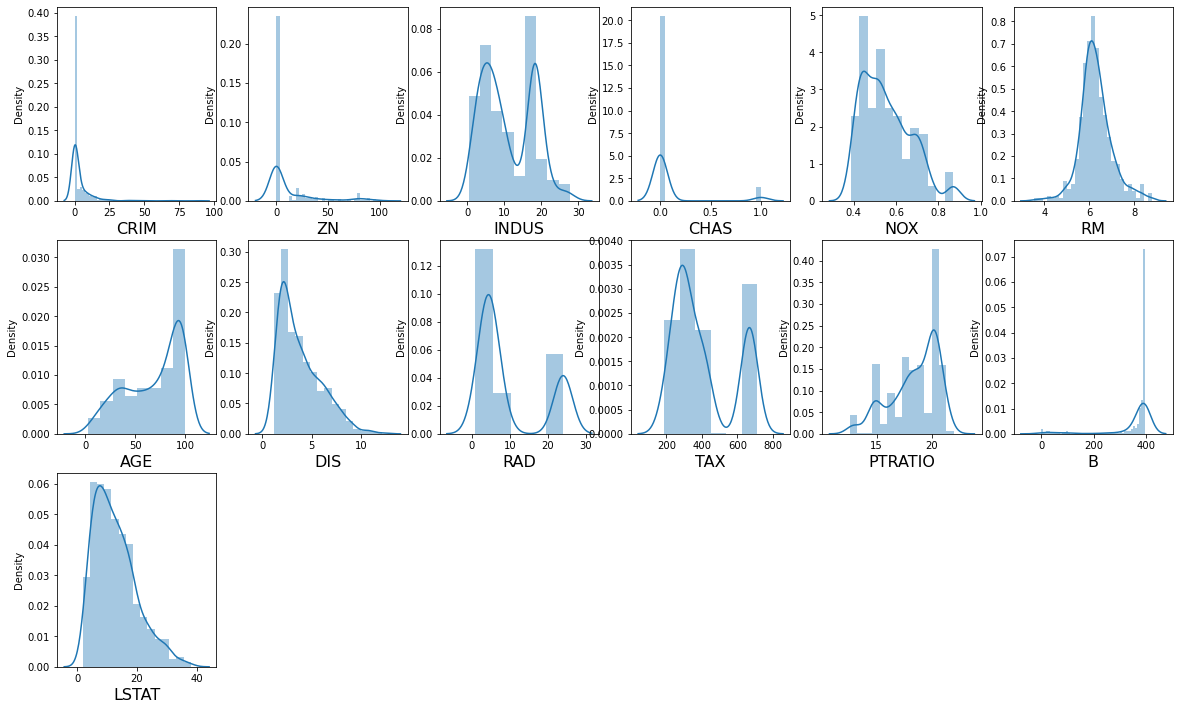

In [12]:
plt.figure(figsize=(20,25), facecolor='white')
plt.rcParams['figure.figsize'] = (20,30)
plotnumber = 1

for i in data_x:
    if plotnumber<=16:
        ax = plt.subplot(6,6,plotnumber)
        sns.distplot(data_x[i])
        plotnumber+=1
        plt.xlabel(i,fontsize = 16)

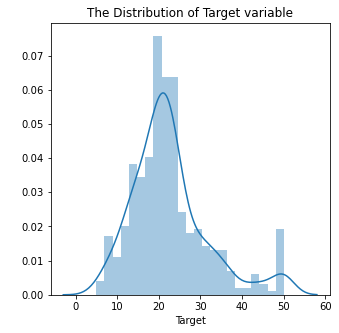

In [13]:
plt.rcParams['figure.figsize'] = (5,5)
sns.distplot(data_y)
plt.title('The Distribution of Target variable')
plt.xlabel('Target')
plt.ylabel(' ')
plt.show()

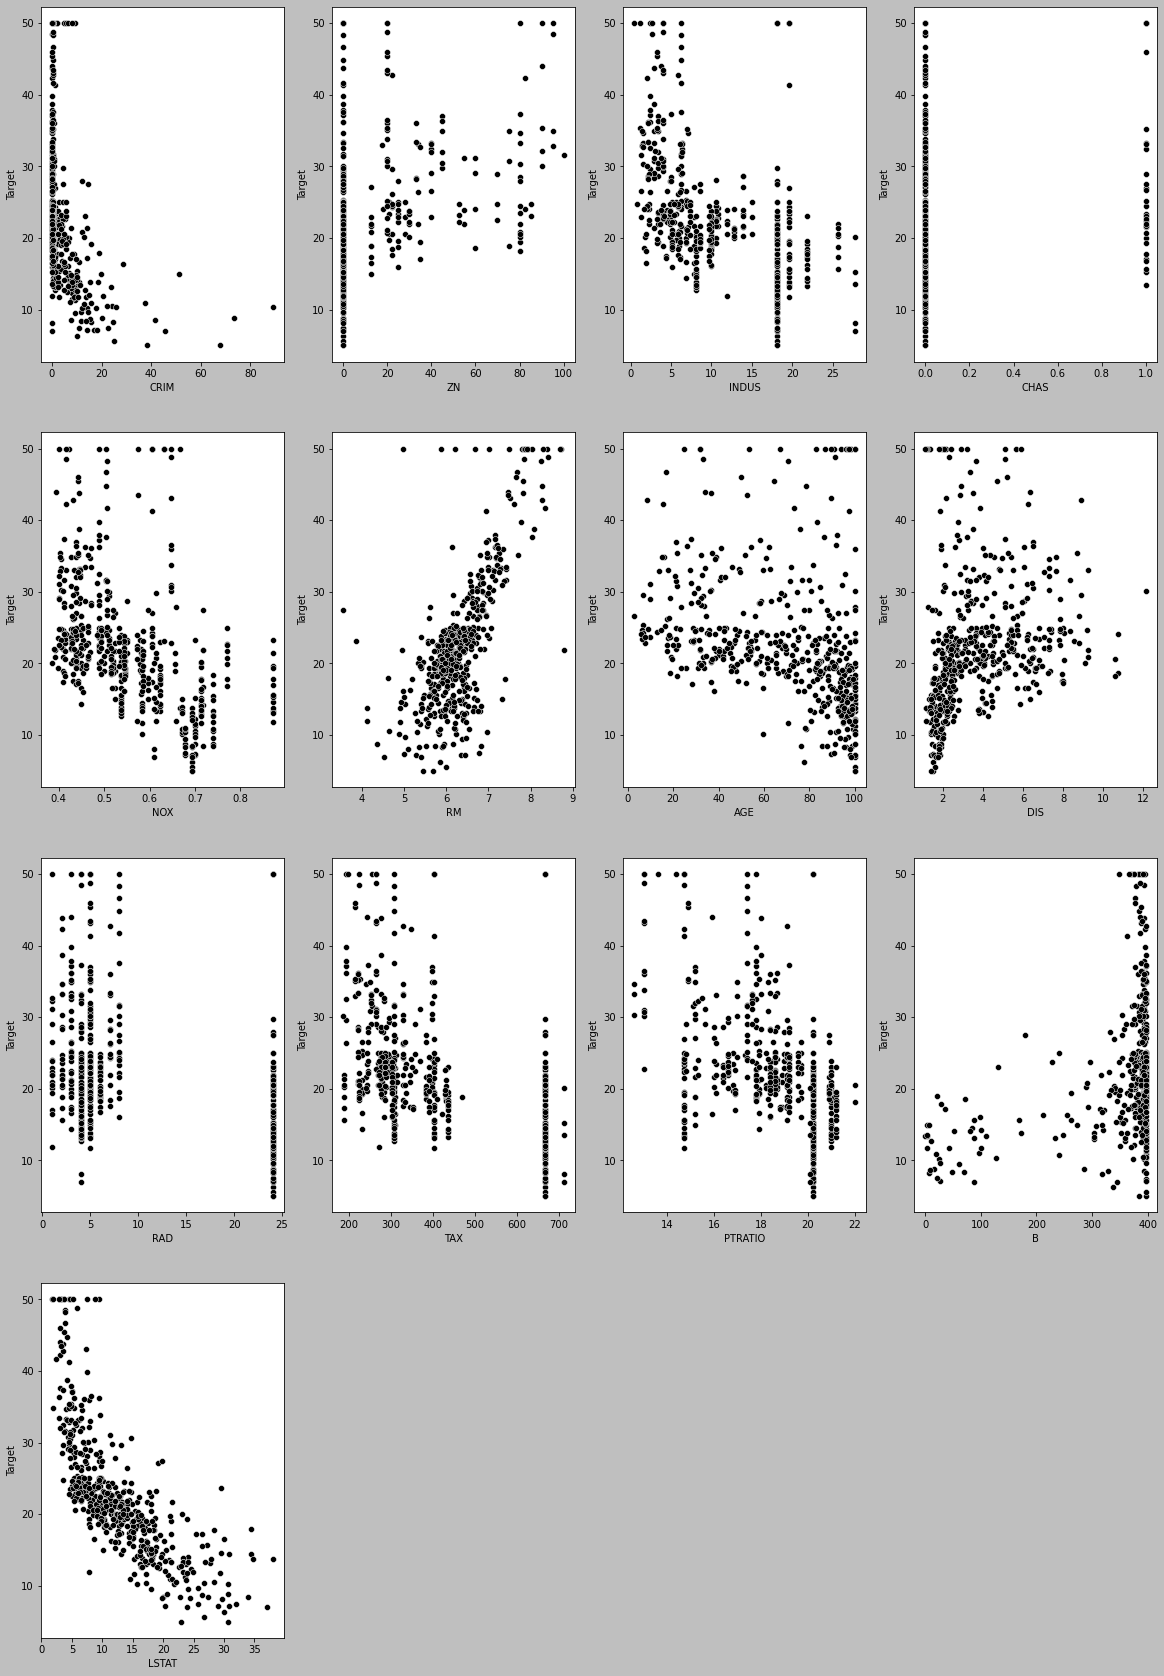

In [14]:
plt.rcParams['figure.figsize'] = (20,30)
plt.style.use('grayscale')
plotnumber = 1
for i in data_x:
    if plotnumber<=16:
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(data_x[i],data_y['Target'])
        plotnumber+=1

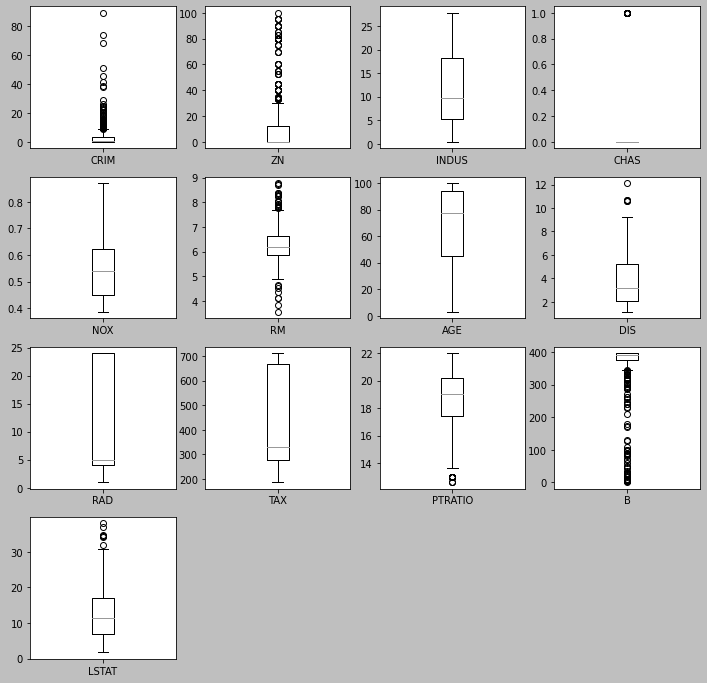

In [15]:
#lets check for outliers
plt.rcParams['figure.figsize'] = (20,5)
data_x.plot(kind = 'box',figsize = (12,12),layout = (4,4),subplots = True)
plt.show()

In [16]:
#splitting dependant and independant feature
x_data = data_x
y_data = data_y
print('The shape of x_data is :',x_data.shape)
print('The shape of y_data is :',y_data.shape)

The shape of x_data is : (506, 13)
The shape of y_data is : (506, 1)


In [17]:
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [18]:
#lets check the variance inflation factor
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

In [19]:
x_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [20]:
variables = x_data
vif = pd.DataFrame()

In [21]:
variables.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [22]:
vif['vif'] = [variance_inflation_factor(variables.values,i) for i in range(len(variables.columns))]
vif['features'] = x_data.columns

In [23]:
vif

,vif,features
0,2.100373,CRIM
1,2.844013,ZN
2,14.485758,INDUS
3,1.152952,CHAS
4,73.894947,NOX
5,77.948283,RM
6,21.386850,AGE
7,14.699652,DIS
8,15.167725,RAD
9,61.227274,TAX


In [24]:
x_data = data_x.loc[:,['INDUS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','LSTAT']]
y_data = data_y

In [25]:
x_data

,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33
...,...,...,...,...,...,...,...,...,...
501,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67
502,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08
503,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64
504,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()
model

LinearRegression()

In [31]:
model.fit(x_train,y_train)

LinearRegression()

In [37]:
model.predict([[11.93,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88]])

array([[22.84004849]])

In [33]:
import pickle

In [34]:
filename = 'final_model.pickle'
pickle.dump(model,open(filename,'wb'))

In [38]:
#prediction using pickle
loaded_model = pickle.load(open(filename,'rb'))
a = loaded_model.predict([[11.93,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88]])

In [39]:
a

array([[22.84004849]])

In [40]:
model.intercept_

array([37.14634131])

In [41]:
model.coef_

array([[ 4.27471817e-02, -1.42933107e+01,  4.16986079e+00,
        -1.28437434e-02, -1.14202712e+00,  1.50280935e-01,
        -8.49774517e-03, -9.93025412e-01, -6.15326225e-01]])

In [42]:
coeff_df = pd.DataFrame(model.coef_,columns = x_data.columns)

In [43]:
coeff_df

,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.042747,-14.293311,4.169861,-0.012844,-1.142027,0.150281,-0.008498,-0.993025,-0.615326


In [44]:
y_pred = model.predict(x_test)

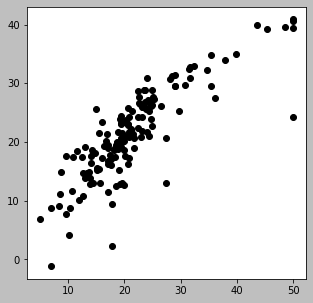

In [45]:
plt.rcParams['figure.figsize'] = (5,5)
plt.scatter(y_test,y_pred)
plt.show()

In [46]:
model.score(x_train,y_train)

0.7124596737437281

In [47]:
#lets find the ajusted_r2
def adj_r2(x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [48]:
adj_r2(x_train,y_train)

0.7049368163707442

In [49]:
#lets check for test
model.score(x_test,y_test)

0.7064135638071367

In [50]:
adj_r2(x_test,y_test)

0.6878059727808284

In [73]:
from sklearn import metrics

In [74]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [79]:
mse = mean_squared_error(y_test,y_pred)
mbs = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [80]:
print(mse)

21.876034177468323


In [81]:
print(mbs)

3.273314871426603


In [82]:
print(rmse)

4.677182290382568
